<p>
<img src="https://drive.google.com/uc?id=1ZHUKcwzA5c-PKUwoGmBG3TsHk6TmZ-Y0" align="left" width="250">
</p>
<p>
<h1><b><center>Mecánica Celeste</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 4</center></b><h2>
<h3><b><center>Viaje a la Luna</center></b><h3>
<h5><center><b>Asignada</b>: 12 de Octubre de 2023</center><h5>
<h5><center><b>Entrega</b>: 26 de Octubre de 2023</center><h5>
</p>

<hr/>
<b>Nombre</b>: Bryan Camilo Restrepo Arcila
<br/>
<b>Cédula</b>: 1000567825
<br/>
<b>Última actualización</b>:
<hr/>

## Enunciado

**Objetivo**: En esta tarea nos proponemos estudiar las denominadas trayectorias de retorno libre a la Luna usando la teoría del CRTBP, apoyado por lo que sabemos el problema de los dos cuerpos.

**Procedimiento**:

Responda primero estas cuestiones usando el problema de los dos cuerpos.

- Una nave espacial se encuentra en una órbita circular inicial alrededor de la Tierra a una distancia de 36 000 km del centro de nuestro planeta. Calcule la velocidad que debe tener la nave respecto al centro de la Tierra para que se mantenga en una órbita circular con ese radio.

- ¿Cuánto debe aumentar la velocidad, $\Delta v$, para que la nave pase de estar en una órbita circular alrededor de la Tierra a una órbita elíptica que tenga perigeo igual a 36 000 km y apogeo igual a la distancia promedio de la Luna (383 000 km)?. A está orbita se la llama *orbita de transferencia de Hohmann*. Obviamente está orbita asume que no existe la Luna.

- Suponga que la Luna arranca en t = 0, en x = 383 000 km, con una órbita circular alrededor de la Tierra. ¿En qué anomalía verdadera debe recibir la nave el impulso $\Delta v$ para que cuando llegue al apogeo la Luna se encuentre con la nave?. Esta es la condición básica que define el caso de una transferencia de Hohmann.

- Calcule las componentes cartesianas de la posición y la velocidad inicial de la nave respecto de la Tierra en la órbita de Hohmann.

Con estos valores indicativos vamos ahora a simular el sistema Tierra-Luna-Nave y a estudiar la trayectoria del vehículo, tanto en un sistema de referencia inercial, como en un sistema de referencia rotante en el que la Tierra y la Luna están en reposo (sistema del CRTBP).

1. Calcule la posición y velocidad inicial de la Tierra en un sistema de referencia inercial en el que el origen está en el centro de masa de la Tierra y la Luna y la Luna y la Tierra orbitan con un semieje mayor relativo igual a 383 000 km.

2. Calcule ahora la posición y velocidad inicial de la nave en el sistema de referencia inercial y en el momento en el que recibe el impulso Para ello simplemente sume a la posición y velocidad inicial de la nave, la posición y velocidad inicial de la Tierra en t = 0.

3. Simule el movimiento de la nave usando la rutina `crtbp_solucion` y mire cómo es la trayectoria, tanto en el sistema rotante como en el sistema de referencia inercial. Calcule la constante de Jacobi, grafique las regiones de exclusión y la superficie de cero velocidad correspondiente a este valor de la constante de Jacobi.

4. Es posible que en el primer intento no consiga la trayectoria deseada (una trayectoria que lleve la nave hasta la Luna y que después la regrese a la Tierra). Modifique con cuidado las condiciones iniciales de la nave (en especial la velocidad incial) hasta que consiga una o varias trayectorias de retorno libre en el sistema. Calcule el apogeo y el perigeo de la trayectoria de la nave respecto a la Tierra y el tiempo que tardaría la nave en salir de la órbita alrededor de la Tierra y en regresar a un punto cercano.

**Resultados esperados**:

- Este notebook con el procedimiento debidamente comentado.

- Datos mínimos:
  - Velocidad de la nave en la órbita circular circumterrestre.
  - Valor del impulso $\Delta v$ para la transferencia de Hohmann.
  - Anomalía inicial de la nave para llegar a la Luna.

- Gráficos mínimos:
  - Gráfico de una o varias trayectorias de retorno libre de la Tierra a la Luna, que incluyan, regiones de exclusión, superficies de cero velocidad-

- Gráficos opcionales:
  - Animación de las trayectorias de retorno libre.

- En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

In [ ]:
#!pip install -q pymcel astropy plotly

Dependencias

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as c,units as u

Constantes

In [32]:
# Constante de gravitación universal
G_international=c.G.value 

# Masa de la tierra en Kg
M_earth = c.M_earth.value

# mu para la tierra
mu_earth_international = G_international*M_earth 

# Periodo sideral de la luna
T_sideral_moon = 27.3 #días

## Conversión de unidades

km2m = 1000 # Kilometros a metros

d2s = 86400 # Días a segundos

deg2rad = np.pi/180 # Grados a radianes


## Solución

- Una nave espacial se encuentra en una órbita circular inicial alrededor de la Tierra a una distancia de 36 000 km del centro de nuestro planeta. Calcule la velocidad que debe tener la nave respecto al centro de la Tierra para que se mantenga en una órbita circular con ese radio.

Para encontyrar esta velocidad podemos usar la vis-viva, definida como:

$$v^2=\mu(\frac{2}{r}-\frac{1}{a})$$

en una circunferencia r=a, así que:

$$v=\sqrt{\frac{\mu}{r}}$$

In [14]:
# Ahora veamos númericamente este valor
r_orbit = 36000*km2m # Radio de la orbita en metros  

# Velocidad que debe tener un satelite en una orbita circular
v_satelite_o = (mu_earth_international/r_orbit)**0.5

print(f'La velocidad del satelite para una orbita circular es :{v_satelite_o:.3f} m/s')

La velocidad del satelite para una orbita circular es :3327.497 m/s


- ¿Cuánto debe aumentar la velocidad, $\Delta v$, para que la nave pase de estar en una órbita circular alrededor de la Tierra a una órbita elíptica que tenga perigeo igual a 36 000 km y apogeo igual a la distancia promedio de la Luna (383 000 km)?. A está orbita se la llama *orbita de transferencia de Hohmann*. Obviamente está orbita asume que no existe la Luna.

Para esto podemos volver a usar la vis-viva, y encontrar nuevamente la velocidad en el perigeo, pero teniendo en cuenta las caracteristicas de la elipse:

Primero encontremos "a":
$$a=\frac{r_{peri}+r_{apo}}{2}$$

con este ya podemos saber cual es la velocidad en el perigeo para la orbita elíptica con la vis-viva:

$$v=\sqrt{\mu(\frac{2}{r_{peri}}-\frac{1}{a})}$$

In [21]:
# Primero definamos ambos radios
r_peri = 36000*km2m
r_apo = 383000*km2m

# Hallemos al parámetro "a" de la elipse:
a_eliptic_orbit = (r_peri + r_apo)/2

# Ahora veamos la velocidad en el perigeo para esta orbita elíptica
v_eliptic_orbit = (mu_earth_international*(2/r_peri-1/a_eliptic_orbit))**0.5

# Entonces el impulso será la diferencia entre la velocidad en la orbita circular
# y la velocidad en el perigeo de la orbita eliptica

delta_v = v_eliptic_orbit - v_satelite_o

print(f'''El impulso que se le debe de dar para alcanzar la orbita
de tranferencia de Hohmann es de {delta_v:.3f} m/s''')

El impulso que se le debe de dar para alcanzar la orbita
de tranferencia de Hohmann es de 1171.597 m/s


- Suponga que la Luna arranca en t = 0, en x = 383 000 km, con una órbita circular alrededor de la Tierra. ¿En qué anomalía verdadera debe recibir la nave el impulso $\Delta v$ para que cuando llegue al apogeo la Luna se encuentre con la nave?. Esta es la condición básica que define el caso de una transferencia de Hohmann.

el solucion a este problema, primero debemos tener en cuenta ¿Cuanto se demora el satelite en ir del perigeo al apogeo?

la respuesta de esta pregunta es la mitad de su periodo orbital, sabemos que el periodo orbital esta dado por la segunda tercera ley de kepler, la cual nos dice que:

$$T=2\pi \sqrt{\frac{a^3}{\mu}}$$

Así el tiempo, que tarda el satelite en ir del perigeo al apogeo es:

$$t=\pi \sqrt{\frac{a^3}{\mu}}$$

entonces con este tiempo y asumiendo una orbita ciruclar para la luna, podemos saber cual es la anomalia verdadera que tiene que estar atrasada la luna, antes de llegar al punto de encuentro con el satelite ya que sabemos el tiempo de retraso y la velocidad angular de la luna, así:

$$\Delta f= w_{moon}*t$$

cabe aclarar que esto no es lo que se pide en el problema, pero podrá ser usado para la solución del mismo ya que son problemas equivalentes desde diferentes marcosa de referencia, ya que en el problema la anomalía verdadera pero del satelite
Ya con este analisis veamoslo númericamente


In [28]:
# Veamos el timepo que tarda el satelite en ir del perigeo al apogeo
t_satelite = np.pi*(a_eliptic_orbit**3/mu_earth_international)**0.5

# Calculemos la velocidad angular de la luna
T_sideral_moon_s = T_sideral_moon*d2s # Segundos
w_moon = 360/T_sideral_moon_s

df = w_moon*t_satelite 

df

72.82544713603487

El anterior angulo corresponde a la diferencia entre la anomalía verdadera de la luna desde el momento que se le da el impulso al satelite hasta cuando se encuentra con la luna, es equivalente decir, que la luna esta en x=383.000 Km en t=0, y que avanzo este angulo hasta encontrarse con el satelite, por tanto el satelite se le tuvo que aplicar  el impulso en una anomalía verdadera de 180 + $\Delta df$, así tenemos que la anomalía verdadera del satelite  para encontrarse con la luna es de:

In [30]:
true_anomaly_satelite = 180 + df
true_anomaly_satelite

252.82544713603488

- Calcule las componentes cartesianas de la posición y la velocidad inicial de la nave respecto de la Tierra en la órbita de Hohmann.

Para la solución de este problema hagamos un diagrama del planteamiento:




Para las posiciones tenemos que:
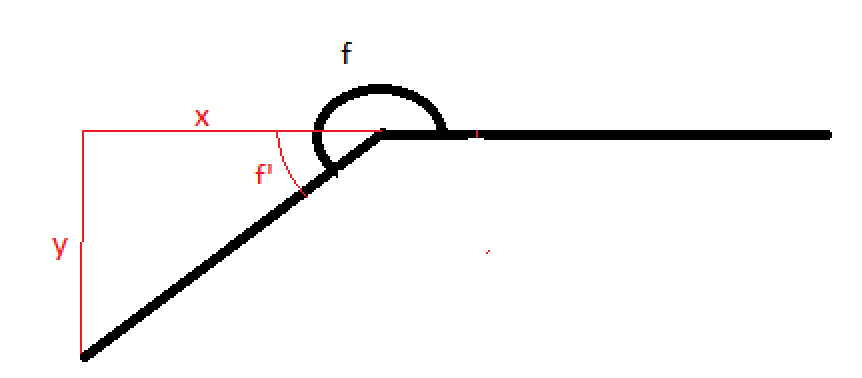

como f'=f-180

Se puede ver claramente que:

$$x = r_{peri} cos(f') = - r_{peri} cos(f)$$
$$y= r_{peri} sin(f') =r_{peri} sin(f)$$

Para las velocidades tenemos el siguiente diagrama:
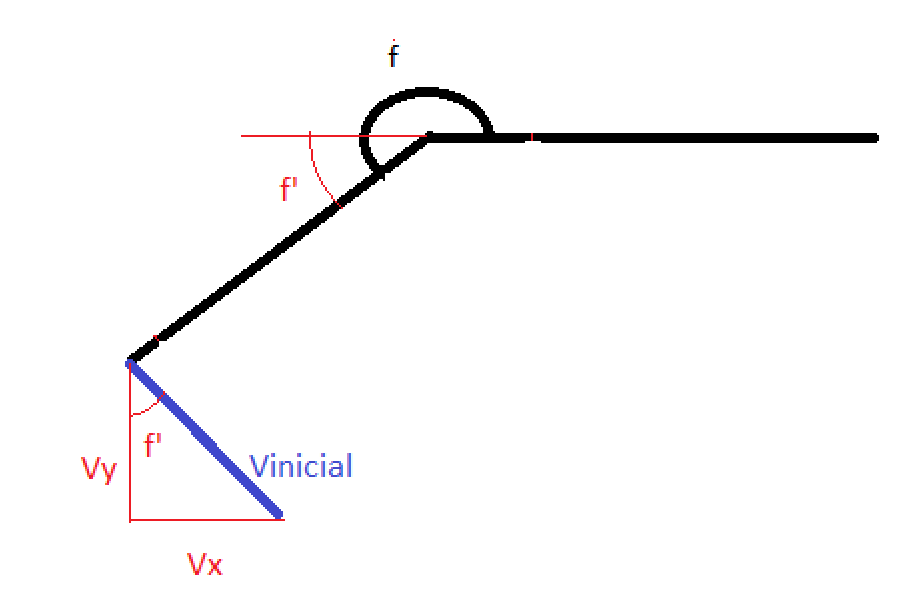

como f'=f-180

Se puede ver claramente que:

$$Vx = V_{peri} sin(f') = V_{peri} sin(f)$$
$$Vy= V_{peri} cos(f') = - V_{peri} cos(f)$$

Ahora que tenemos el como encontrar las componentes de la posición y la velocidad, podemos verlos númericamente:

In [37]:
# Para las posiciones
x_initial = -r_peri*np.cos(true_anomaly_satelite*deg2rad)/km2m
y_initial = r_peri*np.sin(true_anomaly_satelite*deg2rad)/km2m

# Para las velocidades
Vx_initial = v_eliptic_orbit*np.sin(true_anomaly_satelite*deg2rad)
Vy_initial = -v_eliptic_orbit*np.cos(true_anomaly_satelite*deg2rad)

print(f'''Las posiciones y velocidades iniciales de la nave son:
x = {x_initial} 
y = {y_initial}
Vx = {Vx_initial}
Vy = {Vy_initial}
''')

Las posiciones y velocidades iniciales de la nave son:
x = 10630.214895128884 
y = -34394.74569295985
Vx = -4298.476828858075
Vy = 1328.5090932318299

